When exploring a large set of documents -- such as Wikipedia, news articles, StackOverflow, etc. -- it can be useful to get a list of related material. To find relevant documents you typically
* Decide on a notion of similarity
* Find the documents that are most similar 

In the assignment you will
* Gain intuition for different notions of similarity and practice finding similar documents. 
* Explore the tradeoffs with representing documents using raw word counts and TF-IDF
* Explore the behavior of different distance metrics by looking at the Wikipedia pages most similar to President Obamaâs page.

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_distances
from sklearn.metrics.pairwise import euclidean_distances

%matplotlib inline

## Load Wikipedia dataset

We will be using the dataset of abridged Wikipedia pages. Each element of the dataset consists of a link to the wikipedia article, the name of the person, and the text of the article (in lowercase).  

In [94]:
wiki = pd.read_csv('people_wiki.csv')
wiki.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


If you want to check whether the text on the webpage agrees with the one here, you can display it with the following code:

In [ ]:
# from IPython.display import HTML
# print(wiki['text'][0])
# HTML(url=wiki['URI'][0])


Int64Index([35817], dtype='int64')


## Ex. 1: Extract word count vectors

As we have seen in Assignment 4, we can extract word count vectors using `CountVectorizer` function.
- make sure you include words of unit length by using the parameter: `token_pattern=r"(?u)\b\w+\b"`
- do not use any stopwords
- take 10000 most frequent words in the corpus
- explicitly take all the words independent of in how many documents they occur
- obtain the matrix of word counts

In [95]:
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=10000) 
WCmatrix = vectorizer.fit_transform(wiki.text)#.todense()

## Ex. 2: Find nearest neighbors

**a)** Start by finding the nearest neighbors of the Barack Obama page using the above word count matrix to represent the articles and **Euclidean** distance to measure distance.
Save the distances in `wiki['BO-eucl']` and look at the top 10 nearest neighbors.

In [96]:
# One can use the following:
    # from sklearn.neighbors import NearestNeighbors
    # nbrs = NearestNeighbors(n_neighbors=3, algorithm='brute',metric='euclidean').fit(X.toarray())
    # distances, indices = nbrs.kneighbors(X.toarray())
# but here let's use:

BO_site = wiki[wiki['name'] == 'Barack Obama'].index.values[0]
dist = pairwise_distances(WCmatrix, WCmatrix[BO_site])

In [97]:
wiki['BO-eucl'] = dist
wiki_bo_e = wiki.sort_values(by=['BO-eucl'])
wiki_bo_e.head(10)

,URI,name,text,BO-eucl
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...,0.000000
24478,<http://dbpedia.org/resource/Joe_Biden>,Joe Biden,joseph robinette joe biden jr dosf rbnt badn b...,31.336879
28447,<http://dbpedia.org/resource/George_W._Bush>,George W. Bush,george walker bush born july 6 1946 is an amer...,33.645208
48202,<http://dbpedia.org/resource/Tony_Vaccaro>,Tony Vaccaro,michelantonio celestino onofrio vaccaro born d...,33.734256
14754,<http://dbpedia.org/resource/Mitt_Romney>,Mitt Romney,willard mitt romney born march 12 1947 is an a...,34.351128
31423,<http://dbpedia.org/resource/Walter_Mondale>,Walter Mondale,walter frederick fritz mondale born january 5 ...,34.423829
36364,<http://dbpedia.org/resource/Don_Bonker>,Don Bonker,don leroy bonker born march 7 1937 in denver c...,34.597688
13229,<http://dbpedia.org/resource/Francisco_Barrio>,Francisco Barrio,francisco javier barrio terrazas born november...,34.669872
35357,<http://dbpedia.org/resource/Lawrence_Summers>,Lawrence Summers,lawrence henry larry summers born november 30 ...,35.383612
25258,<http://dbpedia.org/resource/Marc_Ravalomanana>,Marc Ravalomanana,marc ravalomanana malagasy ravalumanan born 12...,35.440090


Here is the data frame with an additional column which shows Euclidean distance to neighbours. We can see that for example, Joe Biden is a close neighbour to Barack Obama.

**b)** Measure the pairwise distance between the Wikipedia pages of Barack Obama, George W. Bush, and Joe Biden. Which of the three pairs has the smallest distance?

In [ ]:
GWB_site = wiki[wiki['name'] == 'George W. Bush'].index.values[0]
JB_site = wiki[wiki['name'] == 'Joe Biden'].index.values[0]

dist_JB_BO = pairwise_distances(WCmatrix[JB_site], WCmatrix[BO_site])[0][0]
dist_GWB_BO = pairwise_distances(WCmatrix[GWB_site], WCmatrix[BO_site])[0][0]
dist_GWB_JB = pairwise_distances(WCmatrix[GWB_site], WCmatrix[JB_site])[0][0]


In [ ]:
print("Distance between Barack Obama and Joe Biden sites: ", dist_JB_BO)
print("Distance between Barack Obama and George W. Bush sites: ", dist_GWB_BO)
print("Distance between George W. Bush and Joe Biden sites: ", dist_GWB_JB)

Distance between Barack Obama and Joe Biden sites:  31.336879231984796
Distance between Barack Obama and George W. Bush sites:  33.645207682521445
Distance between George W. Bush and Joe Biden sites:  30.919249667480614


The smallest distance is between George W. Bush and Joe Biden sites.

All of the 10 people from **a)** are politicians, but about half of them have rather tenuous connections with Obama, other than the fact that they are politicians, e.g.,

* Francisco Barrio is a Mexican politician, and a former governor of Chihuahua.
* Walter Mondale and Don Bonker are Democrats who made their career in late 1970s.

Nearest neighbors with raw word counts got some things right, showing all politicians in the query result, but missed finer and important details.

**c)** Let's find out why Francisco Barrio was considered a close neighbor of Obama.
To do this, look at the most frequently used words in each of Barack Obama and Francisco Barrio's pages.

In [98]:
def top_words(name):
    """
    Get a table of the most frequent words in the given person's wikipedia page.
    """
    vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=10000) 
    words = vectorizer.fit_transform(wiki.loc[wiki.name == name].text).toarray()

    df = pd.DataFrame()
    df[''] = vectorizer.get_feature_names()
    df['count'] = words[0]
    df = df.set_index('')

    return df.sort_values(by='count',ascending=False)

In [99]:
obama_words = top_words('Barack Obama')
obama_words

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,count
,
the,40
in,30
and,21
of,18
to,14
...,...
hook,1
husen,1
hussein,1


In [100]:
barrio_words = top_words('Francisco Barrio')
barrio_words


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,count
,
the,36
of,24
and,18
in,17
he,10
...,...
francisco,1
good,1
governance,1


**d)** Extract the list of most frequent **common** words that appear in both Obama's and Barrio's documents and display the five words that appear most often in Barrio's article.

Use a dataframe operation known as **join**. The **join** operation is very useful when it comes to playing around with data: it lets you combine the content of two tables using a shared column (in this case, the index column of words). See [the documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) for more details.

In [101]:
def change_count_column_name(df, new_name):
   df.rename(columns={"count":new_name}, inplace = True)

In [102]:
change_count_column_name(barrio_words, "count_Barrio")
change_count_column_name(obama_words, "count_Obama")

common_words_Obama_Barrio = obama_words.join(barrio_words)
common_words_Obama_Barrio = common_words_Obama_Barrio.sort_values(by='count_Barrio', ascending=False)
common_words_Obama_Barrio.head(15)

,count_Obama,count_Barrio
,,
the,40,36.0
of,18,24.0
and,21,18.0
in,30,17.0
he,7,10.0
to,14,9.0
a,7,6.0
his,11,5.0
as,6,5.0


Despite that Francisco Barrio having rather tenuous connections with Obama, He is among the list nearest neighbours, because of the most frequent words we can see above, these words don't really tell much about a person, these are just words which we often use in the language.


Collect all words that appear both in Barack Obama and George W. Bush pages.  Out of those words, find the 10 words that show up most often in Obama's page. 

In [103]:
bush_words = top_words('George W. Bush')
change_count_column_name(bush_words, "count_Bush")
df = obama_words.join(bush_words)
df.dropna(inplace = True)
df.head(10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,count_Obama,count_Bush
,,
the,40,39.0
in,30,22.0
and,21,14.0
of,18,14.0
to,14,11.0
his,11,6.0
act,8,3.0
a,7,6.0
he,7,8.0


**Note.** Even though common words are swamping out important subtle differences, commonalities in rarer political words still matter on the margin. This is why politicians are being listed in the query result instead of musicians, for example. In the next subsection, we will introduce a different metric that will place greater emphasis on those rarer words.

**e)** Among the words that appear in both Barack Obama and Francisco Barrio, take the 15 that appear most frequently in Obama. How many of the articles in the Wikipedia dataset contain all of those 15 words? Which are they?

In [104]:
df = common_words_Obama_Barrio.dropna(subset=['count_Barrio'])
df = df.sort_values(by='count_Obama', ascending=False).head(25)
df = df.drop(columns=['count_Barrio'])
df

,count_Obama
,
the,40
in,30
and,21
of,18
to,14
his,11
he,7
a,7
as,6


In [105]:
words_Obama = df.head(15).index.tolist()
print(words_Obama)

['the', 'in', 'and', 'of', 'to', 'his', 'he', 'a', 'as', 'was', 'for', 'president', 'control', 'has', 'with']


In [106]:
def words_from_site(name):
  vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=10000) 
  dense = vectorizer.fit_transform(wiki.loc[wiki.name == name].text).toarray()
  words = vectorizer.inverse_transform(dense)[0].tolist()

  return words

In [107]:
def articles_which_contain_given_words(words_list):
  counter = 0
  articles = []

  for name in wiki['name']:

    words_from_current_site = words_from_site(name)

    if all(item in words_from_current_site for item in words_list):
      counter+=1
      articles.append(name)
  return counter, articles

In [ ]:
counter, articles = articles_which_contain_given_words(words_Obama)
print(counter)
print(articles)

138
['Barack Obama', 'Joe Biden', 'George W. Bush', 'Francisco Barrio', 'Paul Kagame', 'Morley Winograd', 'Robert Gerald Lorge', 'James Bilbray', 'Jody Gage', 'Agathon Rwasa', 'Theo Theophanous', 'Michael Marcos Keon', 'William E. Evans (pharmacist)', 'Warren Allmand', 'Greg Gogan', 'Donald Fowler', 'Bill Clinton', 'Fidel Castro', 'Pl%C3%A1cido Mic%C3%B3 Abogo', 'Michel Platini', 'Mikhail Khodorkovsky', 'Russell Trood', 'Michimasa Fujino', 'Bernard Kenny', 'Steven A. Schroeder', 'Paul D. Wohlers', 'Joseph Gaylord', 'Andy Johnson-Laird', 'Federico Capasso', 'Tesfaye Dinka', 'Anas Altikriti', 'Eric Van Stryland', 'Robert K. Dellenbach', 'Helmut Jahn', 'Thilanga Sumathipala', 'Harry Huge', 'Clyde Lewis', 'Brian Behlendorf', 'Abdullah G%C3%BCl', 'Damien Dernoncourt', 'Gerry Wood', 'William M. Hartmann', 'Philip Segal', 'Orde Kittrie', 'Alan Lee Williams', 'Ronald F. Lehman', 'T. Allan McArtor', 'Tony Leachon', 'Abdul Salaam Alizai', 'Donne Trotter', 'Don Ringe', 'Daniel Estulin', 'Trevor E

There is 138 articles which have these words: ['the', 'in', 'and', 'of', 'to', 'his', 'he', 'a', 'as', 'was', 'for', 'president', 'control', 'has', 'with']

In [108]:
print("from: ",words_Obama)
# first -> term (both appear 3 times)
words_Obama = ['the', 'in', 'and', 'of', 'to', 'his', 'he', 'a', 'as', 'was', 'for', 'president', 'control', 'has', 'term']
# words_Obama = ['the', 'of', 'and', 'in', 'he', 'to', 'a', 'his', 'as', 'was', 'has', 'president', 'control', 'for', 'term']
print("to: ",words_Obama)

from:  ['the', 'in', 'and', 'of', 'to', 'his', 'he', 'a', 'as', 'was', 'for', 'president', 'control', 'has', 'with']
to:  ['the', 'in', 'and', 'of', 'to', 'his', 'he', 'a', 'as', 'was', 'for', 'president', 'control', 'has', 'term']


There is one change in the last word: "with" -> "term" both of these words appear 3 times in the article.

In [109]:
counter, articles = articles_which_contain_given_words(words_Obama)
print(counter)
print(articles)

30
['Donald Fowler', 'Chris Redfern', 'James Bilbray', 'Paul Kagame', 'Bernard Kenny', 'Paul Sarlo', 'Gy%C3%B6rgy Sur%C3%A1nyi', 'Morley Winograd', 'David Ibarra Mu%C3%B1oz', 'Francisco Barrio', 'Charles Taylor (Liberian politician)', 'Jesse Ventura', 'Joe Biden', 'George W. Bush', 'Arturo Vallarino', 'John O. Agwunobi', 'Jimmy Carter', 'Barack Obama', 'Bill Clinton', 'John Garamendi', 'Helmut Anheier', 'Edward Rowny', 'Henry Sanders (Alabama politician)', 'Saber Hossain Chowdhury', 'Russell Trood', 'Robert Lewis Morgan', 'Ewart Brown', 'Chuck Wolfe (executive)', 'Lokman Singh Karki', 'Hu Jintao']


It depends on the list of words when I change the order of words and take the first 15 of them I won't use some of the words which appear just as often. So for this set of words: ['the', 'in', 'and', 'of', 'to', 'his', 'he', 'a', 'as', 'was', 'for', 'president', 'control', 'has', 'term'] is 30 articles on Wikipedia which contain it all.

## Ex. 3: TF-IDF to the rescue

Much of the perceived commonalities between Obama and Barrio were due to occurrences of extremely frequent words, such as "the", "and", and "his". So nearest neighbors is recommending plausible results sometimes for the wrong reasons.

To retrieve articles that are more relevant, we should focus more on rare words that don't happen in every article. **TF-IDF** (term frequencyâinverse document frequency) is a feature representation that penalizes words that are too common.

**a)** Repeat the search for the 10 nearest neighbors of Barack Obama with Euclidean distance of TF-IDF. This time do not limit to only 10000 most frequent words, but take all of them.

In [118]:
# We could use:
    # from sklearn.feature_extraction.text import TfidfVectorizer
# but since we already know how to compute CountVectorizer, let's use:

vectorizer_tfidf = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None) 

WCmatrix_tfidf= vectorizer_tfidf.fit_transform(wiki.text)

tfidf=TfidfTransformer(smooth_idf=False, norm=None)# Your code goes here; use smooth_idf=False, norm=None
TFIDFmatrix = tfidf.fit_transform(WCmatrix_tfidf)

In [119]:
# now recompute the distances as before but for TF-IDF
dist_tfidf_e = euclidean_distances(TFIDFmatrix, TFIDFmatrix[wiki.index[wiki["name"] == "Barack Obama"]])
# dist_tfidf = pairwise_distances(TFIDFmatrix, TFIDFmatrix[wiki.index[wiki["name"] == "Barack Obama"]])
# add the distances as a column in the wiki dataframe
wiki['BO-eucl-TF-IDF'] = dist_tfidf_e
wiki_e = wiki.sort_values(by=['BO-eucl-TF-IDF'])
wiki_e[['name','BO-eucl-TF-IDF']].head(10)

,name,BO-eucl-TF-IDF
35817,Barack Obama,0.000000
38376,Samantha Power,139.364493
46811,Jeff Sessions,139.757740
7914,Phil Schiliro,139.812175
38714,Eric Stern (politician),140.450064
6507,Bob Menendez,141.661111
44681,Jesse Lee (politician),142.342440
6796,Eric Holder,142.490179
38495,Barney Frank,142.581337
56008,Nathan Cullen,142.751073


Let's determine whether this list makes sense.
* With a notable exception of Nathan Cullen, the other 8 are all American politicians who are contemporaries of Barack Obama.
* Phil Schiliro, Jesse Lee, Samantha Power, Eric Stern, Eric Holder worked for Obama.

Clearly, the results are more plausible with the use of TF-IDF. Let's take a look at the word vector for Obama and Schilirio's pages. Notice that TF-IDF representation assigns a weight to each word. This weight captures relative importance of that word in the document.

**b)** Sort the words in Obama's article by their TF-IDF weights; do the same for Schiliro's article as well.
Using the **join** operation we learned earlier, compute the common words shared by Obama's and Schiliro's articles.
Sort the common words by their TF-IDF weights in Obama's document.

In [111]:
def top_words_tf_idf(name):
  """
  Get a table of the largest tf-idf words in the given person's wikipedia page.
  """
  site = wiki.index[wiki["name"] == name]

  vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None) 

  WCmatrix= vectorizer.fit_transform(wiki.text)

  tfidf=TfidfTransformer(smooth_idf=False, norm=None)
  TFIDFmatrix = tfidf.fit_transform(WCmatrix)

  tfidf_weights = TFIDFmatrix[site].T.toarray()
  df = pd.DataFrame(tfidf_weights, index = vectorizer.get_feature_names(), columns=['tf-idf'])

  return df.sort_values(by='tf-idf',ascending=False)

In [112]:
obama_tf_idf = top_words_tf_idf('Barack Obama')
schiliro_tf_idf = top_words_tf_idf('Phil Schiliro')

schiliro_tf_idf.rename(columns={"tf-idf":"tf-idf_Schiliro"}, inplace = True)
obama_tf_idf.rename(columns={"tf-idf":"tf-idf_Obama"}, inplace = True)
  
common_words_Obama_Schiliro = obama_tf_idf.join(schiliro_tf_idf)
# common_words_Obama_Schiliro = common_words_Obama_Schiliro.sort_values(by='tf-idf_Obama', ascending=False)
common_words_Obama_Schiliro = common_words_Obama_Schiliro.replace(0, np.nan).dropna(subset=['tf-idf_Schiliro'])
common_words_Obama_Schiliro.head(15)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tf-idf_Obama,tf-idf_Schiliro
obama,52.295653,11.621256
the,40.004063,10.001016
in,30.028962,5.004827
and,21.015648,6.004471
law,20.722936,10.361468
of,18.074811,9.037406
democratic,16.410689,8.205344
to,14.657229,7.328615
his,13.888726,1.262611
senate,13.164288,4.388096


**c)** Among the words that appear in both Barack Obama and Phil Schiliro, take the 15 that have largest weights in Obama. How many of the articles in the Wikipedia dataset contain all of those 15 words? Which are they?

In [113]:
df = common_words_Obama_Schiliro.head(15).drop(columns=["tf-idf_Schiliro"])
words_Obama_tfidf = df.index.tolist()
df

,tf-idf_Obama
obama,52.295653
the,40.004063
in,30.028962
and,21.015648
law,20.722936
of,18.074811
democratic,16.410689
to,14.657229
his,13.888726
senate,13.164288


In [10]:
print(words_Obama_tfidf)
counter, articles = articles_which_contain_given_words(words_Obama_tfidf)
print(counter)
print(articles)

['obama', 'the', 'in', 'and', 'law', 'of', 'democratic', 'to', 'his', 'senate', 'president', 'presidential', 'he', 'states', '2011']
3
['Phil Schiliro', 'Joe Biden', 'Barack Obama']


There are only 3 articles which contain these words. Because there are more important words.

Notice the huge difference in this calculation using TF-IDF scores instead  of raw word counts. We've eliminated noise arising from extremely common words.

## Ex. 4: Choosing metrics

**a)** Compute the Euclidean distance between TF-IDF features of Obama and Biden.

In [120]:
dist = wiki_e['BO-eucl-TF-IDF'][wiki.index[wiki["name"] == 'Joe Biden']]
dist

24478    148.778454
Name: BO-eucl-TF-IDF, dtype: float64

The distance is larger than the distances we found for the 10 nearest neighbors, which we repeat here for readability:

In [121]:
wiki_e.sort_values(by='BO-eucl-TF-IDF',ascending=True)[['name','BO-eucl-TF-IDF']][0:10]

,name,BO-eucl-TF-IDF
35817,Barack Obama,0.000000
38376,Samantha Power,139.364493
46811,Jeff Sessions,139.757740
7914,Phil Schiliro,139.812175
38714,Eric Stern (politician),140.450064
6507,Bob Menendez,141.661111
44681,Jesse Lee (politician),142.342440
6796,Eric Holder,142.490179
38495,Barney Frank,142.581337
56008,Nathan Cullen,142.751073


But one may wonder, is Biden's article that different from Obama's, more so than, say, Schiliro's? It turns out that, when we compute nearest neighbors using the Euclidean distances, we unwittingly favor short articles over long ones.

**b)** Let us compute the length of each Wikipedia document, and examine the document lengths for the 100 nearest neighbors to Obama's page. To compute text length use the same splitting rules you used in `vectorizer`.

In [123]:
def compute_length(row):
  return len(row.split(' '))

length = []
for row in wiki.text:
  length.append(compute_length(row))

wiki['length'] = length
nearest_neighbors_euclidean = wiki_e.sort_values(by='BO-eucl-TF-IDF',ascending=True)
nearest_neighbors_euclidean

,URI,name,text,BO-eucl,length,BO-eucl-TF-IDF
35817,<http://dbpedia.org/resource/Barack_Obama>,Barack Obama,barack hussein obama ii brk husen bm born augu...,0.000000,540,0.000000
38376,<http://dbpedia.org/resource/Samantha_Power>,Samantha Power,samantha power born september 21 1970 is an ir...,42.544095,310,139.364493
46811,<http://dbpedia.org/resource/Jeff_Sessions>,Jeff Sessions,jefferson beauregard jeff sessions iii born de...,46.518813,230,139.757740
7914,<http://dbpedia.org/resource/Phil_Schiliro>,Phil Schiliro,phil schiliro is an american political consult...,52.402290,208,139.812175
38714,<http://dbpedia.org/resource/Eric_Stern_(polit...,Eric Stern (politician),eric stern is the director of operations for t...,45.310043,255,140.450064
...,...,...,...,...,...,...
17589,<http://dbpedia.org/resource/Mohamed_Sillah>,Mohamed Sillah,mohamed yahya sillah was born december 12 1949...,133.469098,1624,763.523987
18032,<http://dbpedia.org/resource/Akhtar_Mohiuddin>,Akhtar Mohiuddin,akhtar mohiuddin born in chaman pakistan is th...,214.916263,2338,867.740533
40208,<http://dbpedia.org/resource/Kcho>,Kcho,kchosometimes spelled kcho born alexis leiva m...,573.808330,5351,1173.683128
1681,<http://dbpedia.org/resource/Abe_Gupta>,Abe Gupta,abe gupta is an american politician and a memb...,397.200201,4474,1375.468452


In [124]:
nearest_neighbors_euclidean = nearest_neighbors_euclidean[:100]
nearest_neighbors_euclidean[['name', 'length', 'BO-eucl-TF-IDF']]

,name,length,BO-eucl-TF-IDF
35817,Barack Obama,540,0.000000
38376,Samantha Power,310,139.364493
46811,Jeff Sessions,230,139.757740
7914,Phil Schiliro,208,139.812175
38714,Eric Stern (politician),255,140.450064
...,...,...,...
12834,Mark Waller (judge),211,146.796202
11303,Steven Weinberg,227,146.815087
8277,John M. Facciola,207,146.823495
11996,Thomas H. Jackson,216,146.836489


**c)** To see how these document lengths compare to the lengths of other documents in the corpus, make a histogram of the document lengths of Obama's 100 nearest neighbors and compare to a histogram of document lengths for all documents.

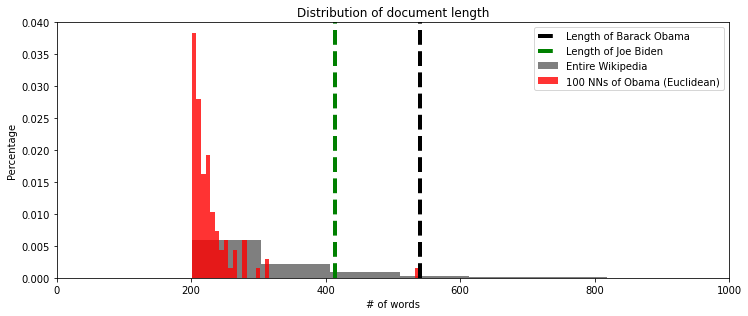

In [190]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, histtype = 'stepfilled', color='k',
         density=True, label = 'Entire Wikipedia', alpha = 0.5)

plt.hist(nearest_neighbors_euclidean['length'], 50, histtype = 'stepfilled', color='r',
        density=True, label = '100 NNs of Obama (Euclidean)', alpha = 0.8)

plt.axvline(wiki.loc[wiki['name'] == 'Barack Obama', 'length'].values, 
            color = 'black', linestyle = '--', linewidth = 4,
            label = 'Length of Barack Obama')

plt.axvline(wiki.loc[wiki['name'] == 'Joe Biden', 'length'].values, 
            color = 'g', linestyle = '--', linewidth = 4,
            label = 'Length of Joe Biden')


plt.axis([0, 1000, 0, 0.04])
plt.legend(loc = 'best')
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.tight_layout()

Relative to the rest of Wikipedia, nearest neighbors of Obama are overwhemingly short, most of them being shorter than 300 words. The bias towards short articles is not appropriate in this application as there is really no reason to  favor short articles over long articles (they are all Wikipedia articles, after all). Many of the Wikipedia articles are 300 words or more, and both Obama and Biden are over 300 words long.

**Note**: For the interest of computation time, the dataset given here contains _excerpts_ of the articles rather than full text. For instance, the actual Wikipedia article about Obama is around 25000 words. Do not be surprised by the low numbers shown in the histogram.

**Note:** Both word-count features and TF-IDF are proportional to word frequencies. While TF-IDF penalizes very common words, longer articles tend to have longer TF-IDF vectors simply because they have more words in them.

To remove this bias, we turn to **cosine distances**:
$$
d(\mathbf{x},\mathbf{y}) = 1 - \frac{\mathbf{x}^T\mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|}
$$
Cosine distances let us compare word distributions of two articles of varying lengths.

**d)** Train a new nearest neighbor model, this time with cosine distances.  Then repeat the search for Obama's 100 nearest neighbors and make a plot to better visualize the effect of having used cosine distance in place of Euclidean on our TF-IDF vectors.

In [82]:
# now recompute the distances as before but for TF-IDF

dist_tfidf_c = cosine_distances(TFIDFmatrix, TFIDFmatrix[wiki.index[wiki["name"] == "Barack Obama"]])
# add the distances as a column in the wiki dataframe
wiki['BO-cos-TF-IDF'] = dist_tfidf_c
wiki_c = wiki.sort_values(by=['BO-cos-TF-IDF'])
nearest_neighbors_cosine = wiki_c[['name',	'length',	'BO-cos-TF-IDF']][:100]
nearest_neighbors_cosine

,name,length,BO-cos-TF-IDF
35817,Barack Obama,540,0.000000
24478,Joe Biden,414,0.572725
57108,Hillary Rodham Clinton,580,0.616149
38376,Samantha Power,310,0.625797
38714,Eric Stern (politician),255,0.651475
...,...,...,...
2045,Allan Ryan (attorney),291,0.731376
47085,Ray Thornton,326,0.731908
16392,P%C3%A9ter Kov%C3%A1cs (lawyer),365,0.732172
55495,Lokman Singh Karki,2486,0.732608


From a glance at the above table, things look better.  For example, we now see Joe Biden as Barack Obama's nearest neighbor!  We also see Hillary Clinton on the list.  This list looks even more plausible as nearest neighbors of Barack Obama.

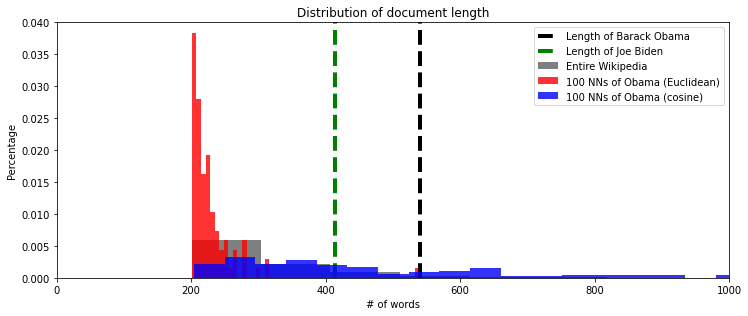

In [198]:
plt.figure(figsize=(10.5,4.5))
plt.hist(wiki['length'], 50, histtype = 'stepfilled', color='k',
         density=True, label = 'Entire Wikipedia', alpha = 0.5)

plt.hist(nearest_neighbors_euclidean['length'], 50, histtype = 'stepfilled', color='r',
        density=True, label = '100 NNs of Obama (Euclidean)', alpha = 0.8)

plt.hist(nearest_neighbors_cosine['length'], 50, color='b', edgecolor='None', histtype='stepfilled', density=True,
         label='100 NNs of Obama (cosine)', zorder=11, alpha=0.8)

plt.axvline(wiki.loc[wiki['name'] == 'Barack Obama', 'length'].values, 
            color = 'black', linestyle = '--', linewidth = 4,
            label = 'Length of Barack Obama')

plt.axvline(wiki.loc[wiki['name'] == 'Joe Biden', 'length'].values, 
            color = 'g', linestyle = '--', linewidth = 4,
            label = 'Length of Joe Biden')


plt.axis([0, 1000, 0, 0.04])
plt.legend(loc = 'best')
plt.title('Distribution of document length')
plt.xlabel('# of words')
plt.ylabel('Percentage')
plt.tight_layout()

Indeed, the 100 nearest neighbors using cosine distance provide a sampling across the range of document lengths, rather than just short articles like Euclidean distance provided.

**Moral of the story**: In deciding the features and distance measures, check if they produce results that make sense for your particular application.

## Ex. 5: Problem with cosine distances: tweets vs. long articles

Happily ever after? Not so fast. Cosine distances ignore all document lengths, which may be great in certain situations but not in others. For instance, consider the following (admittedly contrived) example.

```
+--------------------------------------------------------+
|                                             +--------+ |
|  One that shall not be named                | Follow | |
|  @username                                  +--------+ |
|                                                        |
|  Democratic governments control law in response to     |
|  popular act.                                          |
|                                                        |
|  8:05 AM - 16 May 2016                                 |
|                                                        |
|  Reply   Retweet (1,332)   Like (300)                  |
|                                                        |
+--------------------------------------------------------+
```

**a)** Transform the tweet into TF-IDF features, using the fit to the Wikipedia dataset. (That is, let's treat this tweet as an article in our Wikipedia dataset and see what happens.) How similar is this tweet to Barack Obama's Wikipedia article? 

In [46]:
df = pd.DataFrame({'text': ['democratic governments control law in response to popular act']})
wiki_with_tweet = wiki.text
wiki_with_tweet = wiki_with_tweet.append(df.iloc[0])

In [47]:
wiki_with_tweet

0        digby morrell born 10 october 1979 is a former...
1        alfred j lewy aka sandy lewy graduated from un...
2        harpdog brown is a singer and harmonica player...
3        franz rottensteiner born in waidmannsfeld lowe...
4        henry krvits born 30 december 1974 in tallinn ...
                               ...                        
59067    scott francis crago born july 26 1963 twin bro...
59068    david william royce cass born 27 march 1962 in...
59069    keith hector elias born february 3 1972 in lac...
59070    fawaz mohammed damrah arabic fawwz damra was t...
text     democratic governments control law in response...
Length: 59072, dtype: object

In [49]:
vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None) 
WCMx = vectorizer.fit_transform(wiki_with_tweet)

tfidf_transformer = TfidfTransformer(smooth_idf=False, norm=None)
TFIDFMx = tfidf_transformer.fit_transform(WCMx)

tweet_idx = len(wiki_with_tweet) -1 #the last one in df
word_count = WCMx[tweet_idx].toarray().ravel()
tfidf_weights = TFIDFMx[tweet_idx].toarray().ravel()

tweet_df = pd.DataFrame(word_count, index = vectorizer.get_feature_names(), columns=['word_count'])
tweet_df['tf-idf'] = tfidf_weights

tweet_df.sort_values(by = 'tf-idf', ascending = False, inplace = True)
tweet_df.head(9)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,word_count,tf-idf
response,1,5.260279
governments,1,5.166496
control,1,4.721083
act,1,4.459256
democratic,1,4.102312
popular,1,3.764227
law,1,3.453643
to,1,1.046944
in,1,1.000965


Let's compare this tweet's TF-IDF vectors  to Barack Obama's Wikipedia entry.

In [54]:
obama_tf_idf

,tf-idf_Obama
obama,52.295653
the,40.004063
act,35.678223
in,30.028962
iraq,21.747379
...,...
equina,0.000000
equiluz,0.000000
equilium,0.000000
equilibriums,0.000000


In [73]:
words_from_tweet = df.text[0].split(' ')
print(words_from_tweet)
obama_idf = []
tweet_idf = []
for word in words_from_tweet:
  # if(word in obama_tf_idf):
  obama_idf.append(obama_tf_idf.loc[word]['tf-idf_Obama'])
  tweet_idf.append(tweet_df.loc[word]['tf-idf'])

compare_df = pd.DataFrame({"word": words_from_tweet, "Obama_idf": obama_idf, "Tweet_idf": tweet_idf}) 
compare_df.sort_values(by = 'Tweet_idf', ascending = False, inplace = True)

compare_df

['democratic', 'governments', 'control', 'law', 'in', 'response', 'to', 'popular', 'act']


,word,Obama_idf,Tweet_idf
5,response,15.784385,5.260279
1,governments,0.000000,5.166496
2,control,18.887061,4.721083
8,act,35.678223,4.459256
0,democratic,16.410689,4.102312
7,popular,0.000000,3.764227
3,law,20.722936,3.453643
6,to,14.657229,1.046944
4,in,30.028962,1.000965


**b)** Now, compute the cosine distance between the Barack Obama article and this tweet:

In [75]:
dist_tfidf_c = cosine_distances(TFIDFMx[tweet_idx], TFIDFMx[wiki.index[wiki["name"] == "Barack Obama"]])
dist_tfidf_c

array([[0.69868804]])

Let's compare this distance to the distance between the Barack Obama article and all of its Wikipedia nearest neighbors:

In [83]:
nearest_neighbors_cosine[:23]

,name,length,BO-cos-TF-IDF
35817,Barack Obama,540,0.000000
24478,Joe Biden,414,0.572725
57108,Hillary Rodham Clinton,580,0.616149
38376,Samantha Power,310,0.625797
38714,Eric Stern (politician),255,0.651475
28447,George W. Bush,505,0.659478
39357,John McCain,410,0.661645
48693,Artur Davis,371,0.666690
18827,Henry Waxman,279,0.671226
37199,Barry Sullivan (lawyer),893,0.673300


With cosine distances, the tweet is "nearer" to Barack Obama than most people! If someone is reading the Barack Obama Wikipedia page, would you want to recommend they read this tweet?
In practice, it is common to enforce maximum or minimum document lengths. After all, when someone is reading a long article from _The Atlantic_, you wouldn't recommend him/her a tweet.